# Introduction

This notebook aims to understand how various factors affect student performance, specifically their test scores. The factors under consideration include gender, ethnicity, parental level of education, lunch type, and test preparation course.

## What to Expect

In this notebook, we will use graphs to visualize the relationships between these variables and the test scores in a "Student Performance In Exams" dataset.

## The Dataset

The dataset consists of 1000 rows and 8 columns. Below is a brief description of each column:

- **Gender (object)**: The gender of the participant.
  - Possible values: `female`, `male`

- **Race/Ethnicity (object)**: The race or ethnicity of the participant.
  - Possible values: `Group A`, `Group B`, `Group C`, `Group D`, `Group E`

- **Parental Level of Education (object)**: The parental level of education of the participant.
  - Possible values: `bachelor's degree`, `some college`, `master's degree`, `associate's degree`, `high school`, `some high school`

- **Lunch (object)**: The type of lunch the participant receives.
  - Possible values: `standard`, `free/reduced`

- **Test Preparation Course (object)**: Whether the participant took the test preparation course or not.
  - Possible values: `none`, `completed`

- **Math Score (int64)**: The participant's math score.

- **Reading Score (int64)**: The participant's reading score.

- **Writing Score (int64)**: The participant's writing score.

Note: This is a fictional dataset, which means it is not real-world data but artificially generated.

## Questions to be Answered

1. Is there a difference between male and female scores?
2. What factors mainly influence the test scores?

By exploring these questions, we aim to gain insights into the variables that impact student performance in exams.


In [94]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import aider
import numpy as np
import seaborn as sns
from scipy import stats
from prettytable import PrettyTable

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [31]:
data=pd.read_csv("/Users/shrutiparulekar/Desktop/PROJECTS/Student performance/StudentsPerformance.csv")

In [32]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
data.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [34]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [35]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [36]:
#Using Aider
import pandas as pd

# Load CSV file
data_Aider = pd.read_csv('/Users/shrutiparulekar/Desktop/PROJECTS/Student performance/StudentsPerformance.csv')

# Perform cleaning operations (example: dropping missing values)
cleaned_data = data_Aider.dropna()

# Display the cleaned data (optional)
cleaned_data.head()

cleaned_data.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [37]:
data.shape

(1000, 8)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [39]:
data.columns 

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [40]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [41]:
# Calculate total scores and percentages
data['total score'] = data[['math score', 'reading score', 'writing score']].sum(axis=1)
data['percentage'] = round(data['total score'] / 3,2)

# Assign grades based on percentage
def get_grade(percentage):
    if percentage >= 90:
        return 'A'
    elif percentage >= 80:
        return 'B'
    elif percentage >= 70:
        return 'C'
    elif percentage >= 60:
        return 'D'
    elif percentage >= 50:
        return 'E'
    else:
        return 'F'

data['grade'] = data['percentage'].apply(get_grade)


In [42]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,C
1,female,group C,some college,standard,completed,69,90,88,247,82.33,B
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,F
4,male,group C,some college,standard,none,76,78,75,229,76.33,C
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.00,A
996,male,group C,high school,free/reduced,none,62,55,55,172,57.33,E
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.00,D
998,female,group D,some college,standard,completed,68,78,77,223,74.33,C


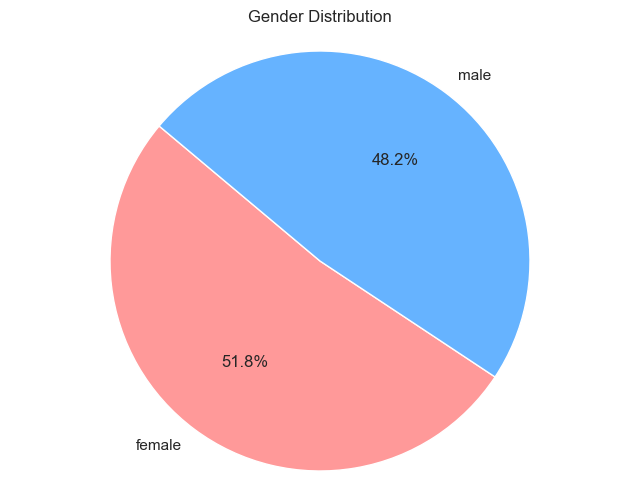

In [43]:
# Count the number of males and females
gender_counts = data['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

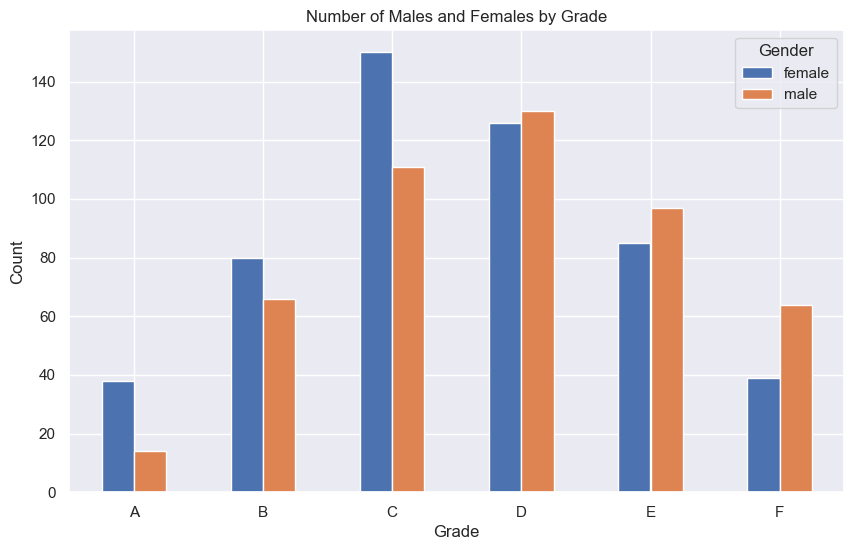

In [44]:
# Count the number of males and females for each grade
grade_gender_counts = data.groupby(['grade', 'gender']).size().unstack().fillna(0)

# Plot a side-by-side bar chart
grade_gender_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Males and Females by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

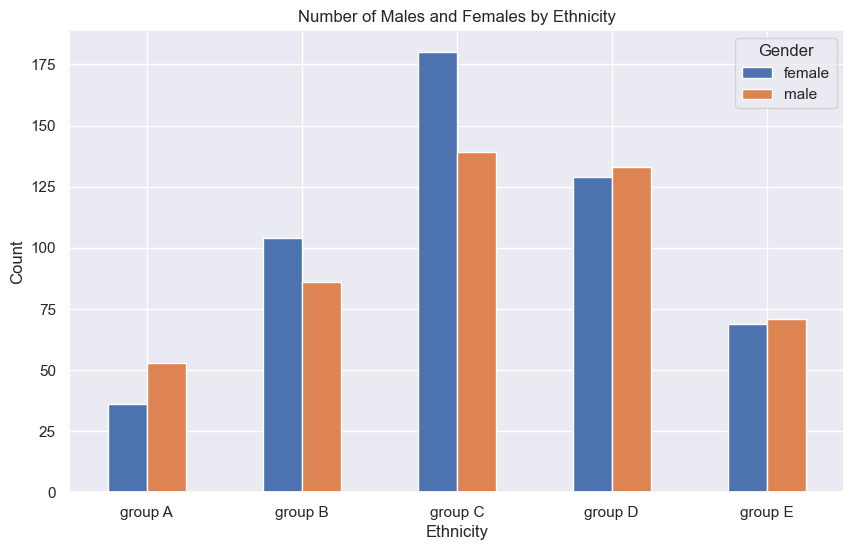

In [46]:
# Count the number of students by gender for each ethnicity
ethnicity_gender_counts = data.groupby(['race/ethnicity', 'gender']).size().unstack().fillna(0)

# Plot a side-by-side bar chart
ethnicity_gender_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Males and Females by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

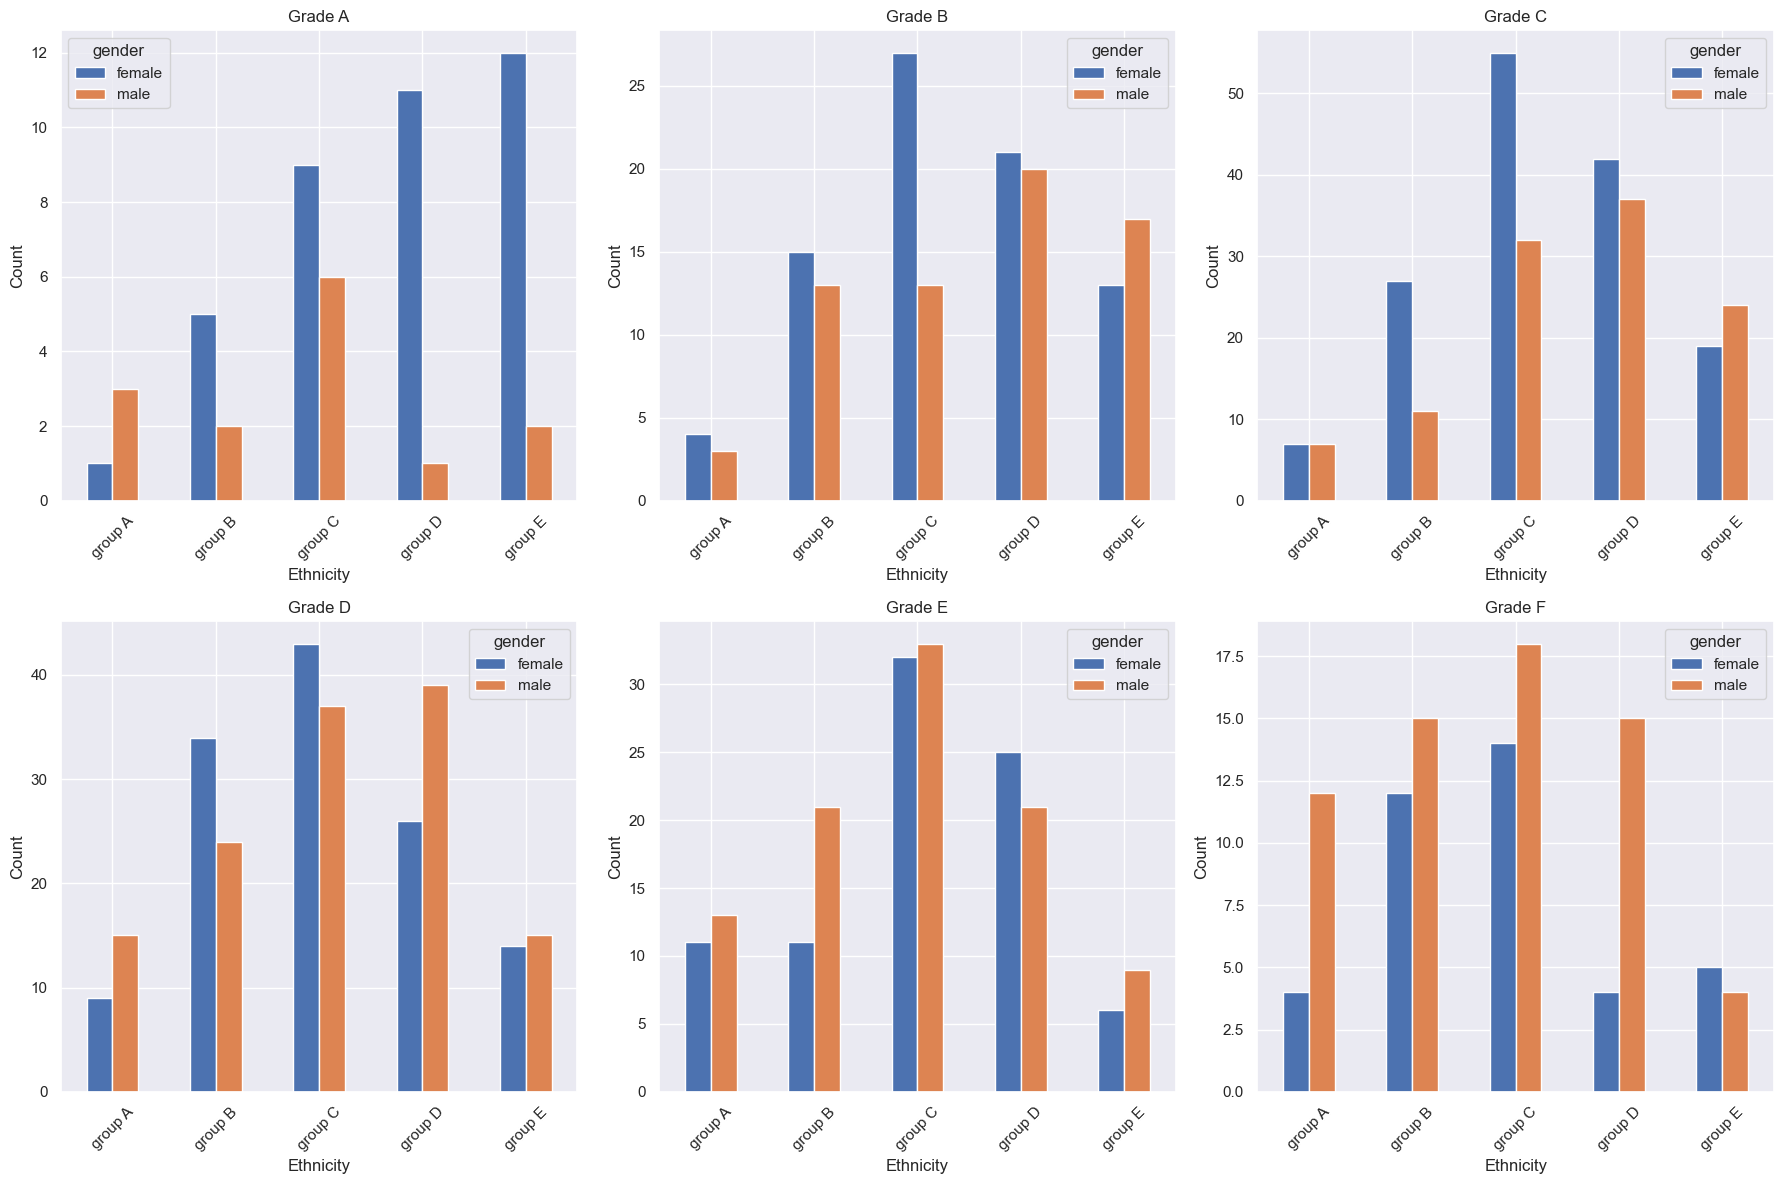

In [47]:
# Count the number of students by gender, ethnicity, and grade
grade_ethnicity_gender_counts = data.groupby(['grade', 'race/ethnicity', 'gender']).size().unstack().fillna(0)

# Get the unique grades
grades = grade_ethnicity_gender_counts.index.levels[0]

# Plot separate bar charts for each grade in a grid layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over each grade and plot
for i, grade in enumerate(grades):
    ax = axes[i]
    grade_data = grade_ethnicity_gender_counts.loc[grade]
    grade_data.plot(kind='bar', stacked=False, ax=ax, title=f'Grade {grade}')
    ax.set_xlabel('Ethnicity')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Grade A: Females generally outperform males across all ethnic groups.
Grade B: Females have higher counts except in Group D where males dominate.
Grade C: Females lead in Groups A, B, and C; males lead in Groups D and E.
Grade D: Males significantly outperform females in all groups.
Grade E: Mixed results with males and females leading in different groups.
Grade F: Males dominate across all ethnic groups.
Overall Trend: Females excel in higher grades; males are more prevalent in lower grades. Significant gender disparity exists in specific ethnic groups, notably Groups C and D.

### Analysis of Student Performance by Gender and Ethnicity

- **Grade A**:
  - Females generally outperform males across all ethnic groups.

- **Grade B**:
  - Females have higher counts except in Group D where males dominate.

- **Grade C**:
  - Females lead in Groups A, B, and C.
  - Males lead in Groups D and E.

- **Grade D**:
  - Males significantly outperform females in all groups.

- **Grade E**:
  - Mixed results with males and females leading in different groups.

- **Grade F**:
  - Males dominate across all ethnic groups.

### Overall Trends:
- **Gender Performance**:
  - Females excel in higher grades (A, B, C).
  - Males are more prevalent in lower grades (D, E, F).

- **Ethnic Group Disparities**:
  - Significant gender disparity exists in specific ethnic groups, notably Groups C and D.

This analysis highlights the performance trends across different grades, showcasing the gender and ethnic disparities in student achievements.


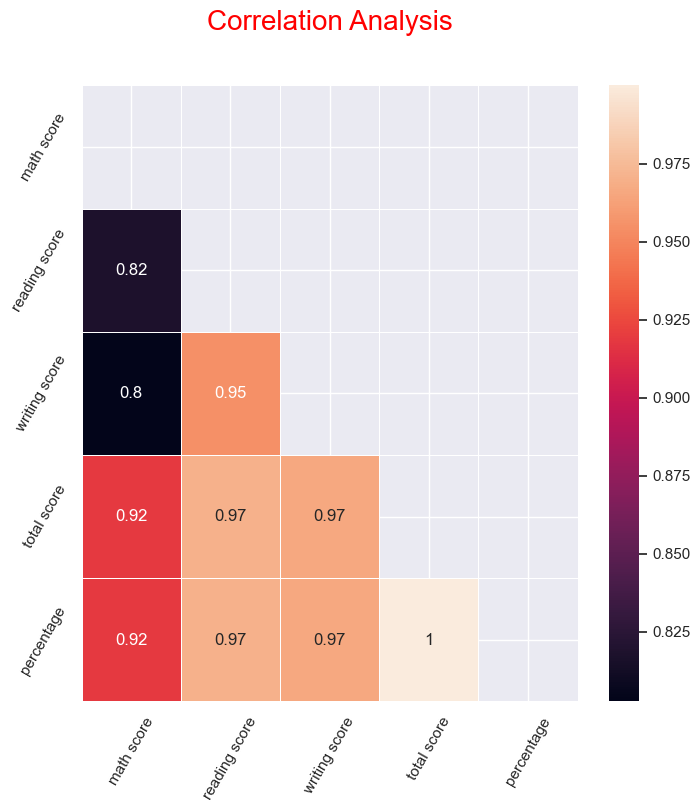

In [55]:
#Correlation Analysis 

plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)

corr = data.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
sns.heatmap(data.corr(),mask=mask,annot=True,linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

### Correlation Analysis

#### Strong Correlations:
- **Reading and Writing Scores**: Very high correlation (0.95), indicating that students who perform well in reading tend to perform equally well in writing.
- **Total Score and Percentage**: Both show very high correlations with reading (0.97), writing (0.97), and math scores (0.92), indicating consistent performance across these subjects.

#### Weak Correlation:
- **Math and Writing Scores**: Lower correlation (0.80) compared to other pairs, suggesting that performance in math is less related to writing skills compared to reading and writing skills.


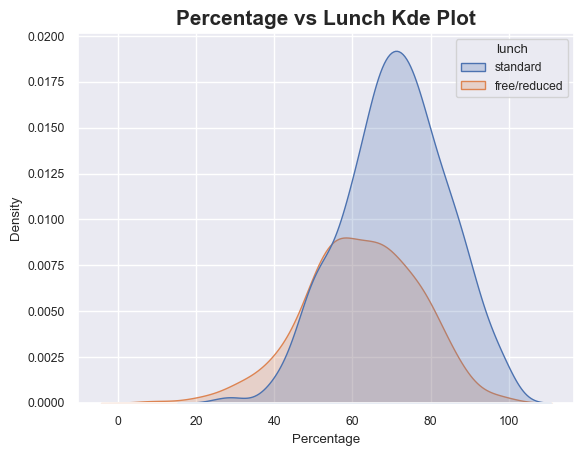

In [59]:
sns.set_context("notebook",font_scale=0.8)
sns.kdeplot(data=data, x="percentage", hue="lunch", multiple="layer",fill=True)
plt.xlabel('Percentage')
plt.title('Percentage vs Lunch Kde Plot',fontsize=15, fontweight='bold')

plt.show()

### Percentage vs Lunch KDE Plot

- **Standard Lunch**:
  - Peak around 70-80% indicating higher performance.
  - Scores mostly between 60% and 90%.

- **Free/Reduced Lunch**:
  - Peak around 50-60% indicating lower performance.
  - Scores mostly between 40% and 70%.

### Key Observations:
- **Performance Difference**:
  - Standard lunch students generally score higher.
  - Free/reduced lunch students tend to score lower.
  
- **Distribution Spread**:
  - Standard lunch: broader distribution with higher peak.
  - Free/reduced lunch: narrower distribution with fewer high scores.

This plot shows that students with standard lunch generally achieve higher percentages than those with free/reduced lunch.


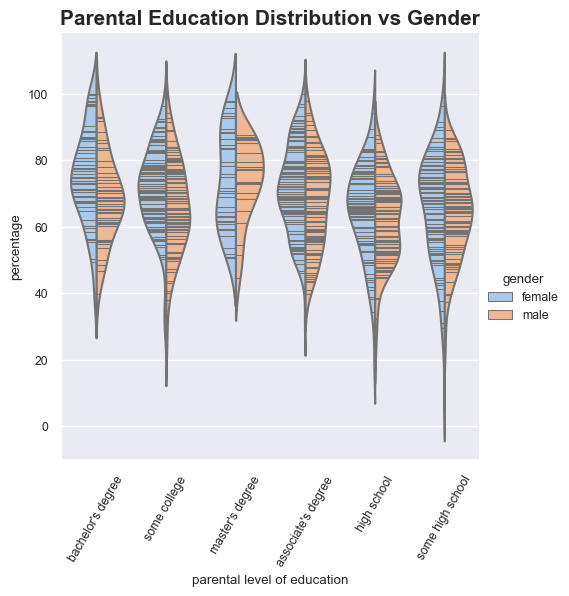

In [61]:
sns.catplot(x="parental level of education", y="percentage", hue="gender",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=data)
plt.title('Parental Education Distribution vs Gender',fontsize=15, fontweight='bold')
plt.xticks(rotation=60)
plt.show()

### Parental Education Distribution vs Percentage

- **Bachelor's Degree**:
  - Both genders show a broad distribution with peaks around 60-80%.
  - Indicates higher student performance when parents have a bachelor's degree.

- **Some College**:
  - Similar distribution for males and females.
  - Peaks around 60-80%, comparable to bachelor's degree.

- **Master's Degree**:
  - Higher peak around 70-90% for both genders.
  - Suggests that higher parental education correlates with higher student performance.

- **Associate's Degree**:
  - Broad distribution with peaks around 60-80% for both genders.
  - Comparable to bachelor's and some college.

- **High School**:
  - Distribution is more spread out, with peaks around 50-70%.
  - Indicates lower performance compared to higher education levels.

- **Some High School**:
  - Peaks around 50-70%, similar to high school.
  - Lower performance observed with lower parental education.

### Key Observations:
- **Higher Education Impact**:
  - Higher parental education (master's degree) correlates with higher student performance.
  
- **Gender Distribution**:
  - Similar performance distribution across genders for each education level.
  - Slight variations observed, but generally consistent.

This plot indicates that higher parental education levels are associated with better student performance, with minimal gender differences within each education level.


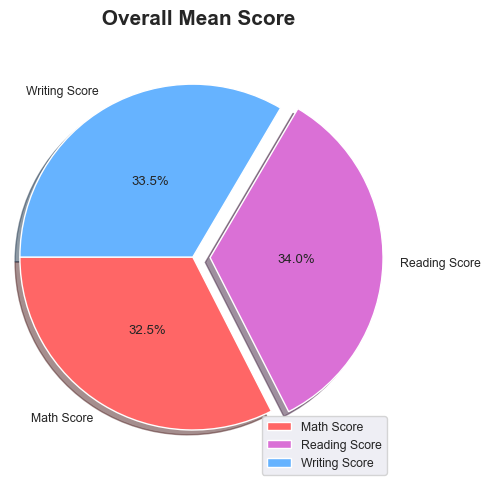

In [62]:
plt.figure(figsize=(5,5))
labels=['Math Score', 'Reading Score', 'Writing Score']
colors=['#ff6666','orchid','#66b3ff']
explode=[0,0.1,0]
values=[data["math score"].mean(),data["reading score"].mean(),data["writing score"].mean()]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True,startangle=180,pctdistance=0.5)
plt.legend(['Math Score', 'Reading Score', 'Writing Score'],loc='lower right')
plt.axis('equal')
plt.title(' Overall Mean Score  ',fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

Reading score has the highest average

# Statistical Visualizations 

### Analysis of Student Performance Data

1. **Math Scores**:
   - **Distribution**: Roughly normal with slight left skew.
   - **Central Tendency**: Most students scored between 60-70.

2. **Reading Scores**:
   - **Distribution**: Symmetrical, normal distribution.
   - **Central Tendency**: Majority of scores in the 60-80 range.

3. **Writing Scores**:
   - **Distribution**: Normal with slight left skew.
   - **Central Tendency**: Scores mostly between 60-80.

4. **Descriptive Statistics Summary**:
   - **Means and Medians**: Similar, indicating normal-like distributions.
   - **Modes**: Reflect common scores aligning with histogram peaks.


Descriptive Statistics:
                count    mean        std   min    25%   50%   75%    max  \
math score     1000.0  66.089  15.163080   0.0  57.00  66.0  77.0  100.0   
reading score  1000.0  69.169  14.600192  17.0  59.00  70.0  79.0  100.0   
writing score  1000.0  68.054  15.195657  10.0  57.75  69.0  79.0  100.0   

               mode    variance  
math score       65  229.918998  
reading score    72  213.165605  
writing score    74  230.907992  


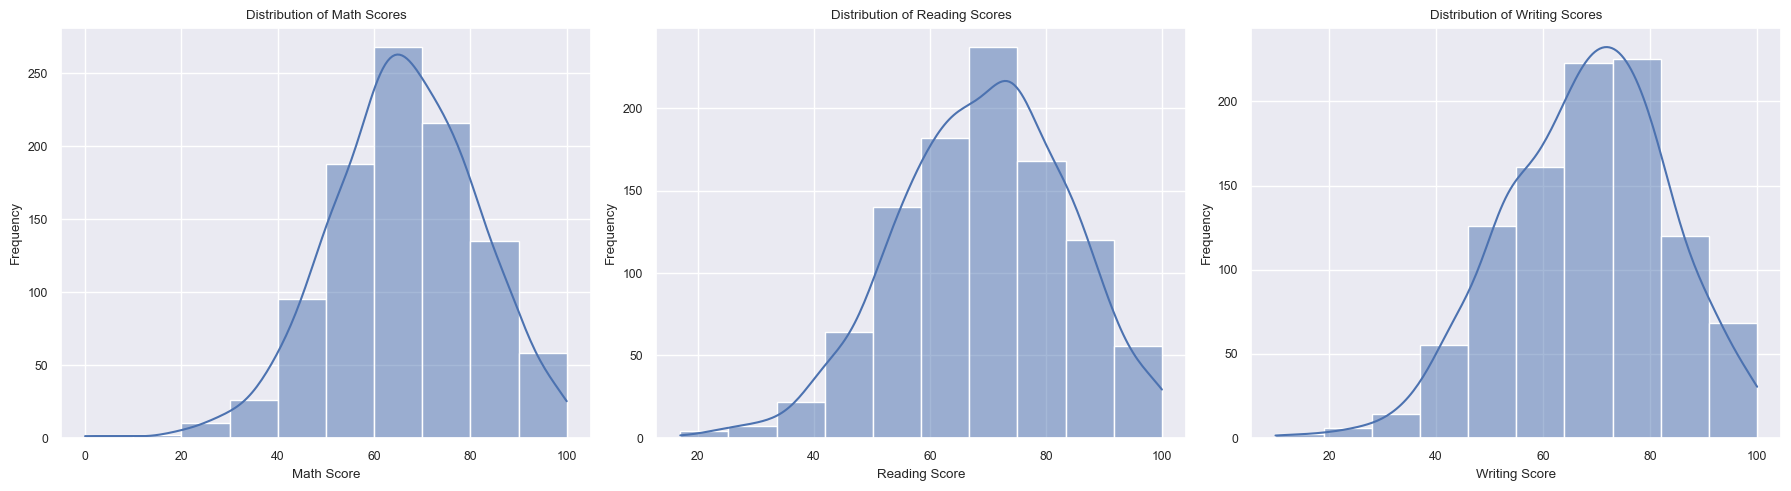

In [67]:
# Calculate mode for each score
modes = data[['math score', 'reading score', 'writing score']].mode().iloc[0]

# Calculate descriptive statistics
descriptive_stats = data[['math score', 'reading score', 'writing score']].describe().transpose()

# Calculate mode for each score
modes = data[['math score', 'reading score', 'writing score']].mode().iloc[0]

# Add mode to descriptive statistics table
descriptive_stats['mode'] = modes
descriptive_stats['variance'] = data[['math score', 'reading score', 'writing score']].var()

# Print descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

# Plot histograms
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['math score'], kde=True, bins=10)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(data['reading score'], kde=True, bins=10)
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(data['writing score'], kde=True, bins=10)
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Hypothesis Testing 

**Null Hypothesis (H0):** There is no significant difference in the mean scores between male and female students.<br>
**Alternative Hypothesis (H1)**: There is a significant difference in the mean scores between male and female students.

Based on the p-values of Maths, reading and writing scores I must say that we **reject the Null hypothesis** and conclude that there is a significant difference in the mean scores between male and female.

Based on the t-statistic value there is significant difference between female and male maths, reading and wrting scores

Males lead in maths score as the T-stats is 5.38 and a positive value 
Females lead in reading and writing scores as the T-stats are negative respectively -7.76 and -9.98


***To compare p-value of 0.05 is used

**Why do T-test?**
A t-test quantifies whether the observed differences in mean scores between male and female students are statistically significant or likely due to random chance.
P-values from t-tests provide a rigorous statistical basis to either reject or fail to reject the null hypothesis.
The t-statistic gives the magnitude of the difference and indicates the direction (which group has a higher mean).
Essential for confirming whether those differences are statistically significant and not just due to random chance.

In [79]:
# Separate data by gender
male_students = data[data['gender'] == 'male']
female_students = data[data['gender'] == 'female']

# T-tests
math_ttest = stats.ttest_ind(male_students['math score'], female_students['math score'])
reading_ttest = stats.ttest_ind(male_students['reading score'], female_students['reading score'])
writing_ttest = stats.ttest_ind(male_students['writing score'], female_students['writing score'])

# Round the t-test results
math_ttest_rounded = (round(math_ttest.statistic, 2), round(math_ttest.pvalue, 5))
reading_ttest_rounded = (round(reading_ttest.statistic, 2), round(reading_ttest.pvalue, 5))
writing_ttest_rounded = (round(writing_ttest.statistic, 2), round(writing_ttest.pvalue, 5))

print(f"Math Score T-Test: Statistic={math_ttest_rounded[0]}, P-value={math_ttest_rounded[1]}")
print(f"Reading Score T-Test: Statistic={reading_ttest_rounded[0]}, P-value={reading_ttest_rounded[1]}")
print(f"Writing Score T-Test: Statistic={writing_ttest_rounded[0]}, P-value={writing_ttest_rounded[1]}")


Math Score T-Test: Statistic=5.38, P-value=0.0
Reading Score T-Test: Statistic=-7.96, P-value=0.0
Writing Score T-Test: Statistic=-9.98, P-value=0.0


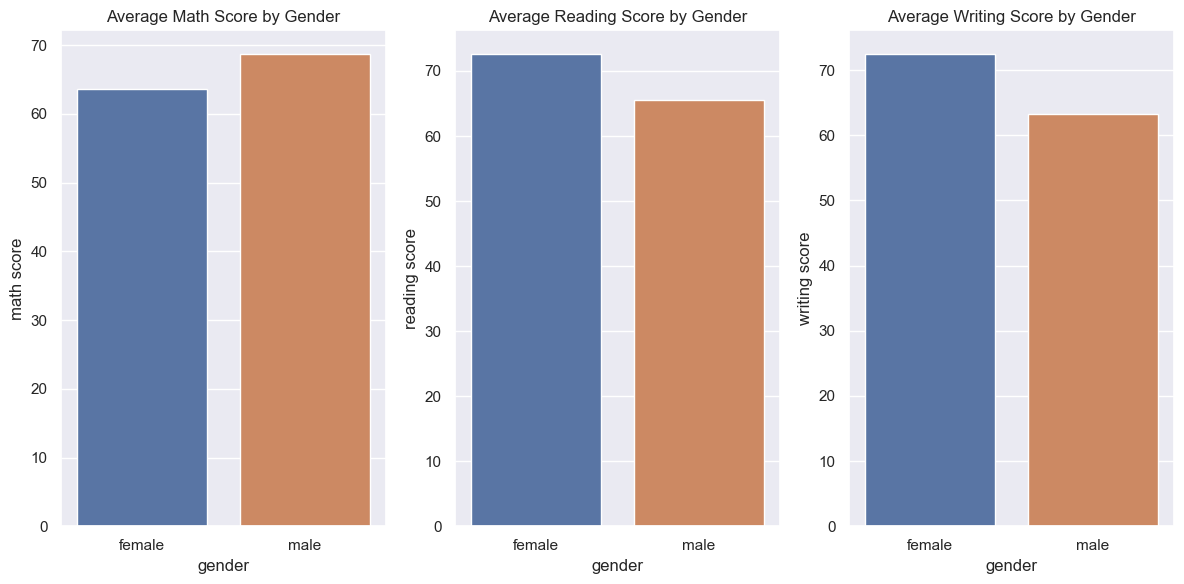

In [81]:
#Visualizing the results 
# Calculate means
mean_scores = data.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()

# Plot bar charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='gender', y='math score', data=mean_scores)
plt.title('Average Math Score by Gender')

plt.subplot(1, 3, 2)
sns.barplot(x='gender', y='reading score', data=mean_scores)
plt.title('Average Reading Score by Gender')

plt.subplot(1, 3, 3)
sns.barplot(x='gender', y='writing score', data=mean_scores)
plt.title('Average Writing Score by Gender')

plt.tight_layout()
plt.show()


## Multivariate Regression

**Goal : To find the effect of Race/ethnicity , parental level of education, lunch, grades on Total scores**<br>
The coefficient for `gender_male` is 0.1933, suggesting a negligible increase in total score for male students compared to female students. <br> The coefficients for different `race/ethnicity` groups (B, C, D, and E) are all negative, implying lower total scores for these groups compared to the reference group. 

Parental education levels also show varying impacts, with coefficients for high school, some college, and some high school indicating lower total scores compared to the reference category. The positive coefficient for `lunch_standard` (2.5307) indicates a slight increase in total score for students with standard lunch. <br> The negative coefficient for `test preparation course_none` (-1.0999) suggests a slight decrease in total score for students who did not complete the test preparation course. 

Lastly, the negative coefficients for grades B through F show a significant decrease in total score compared to the reference grade, with the impact becoming more pronounced as the grade decreases.


**Conclusion**
The regression analysis reveals that gender, race/ethnicity, parental education, lunch type, and test preparation course significantly impact students' total scores, with certain factors like standard lunch and completed test preparation course positively influencing performance.

In [108]:
drop_columns = ['math score', 'reading score','writing score', 'total score', 'percentage', 
                'grade', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F']

In [111]:
# Encode categorical variables
df_encoded = pd.get_dummies(data, drop_first=True)

# Define independent variables (features) and dependent variable (target)
X = df_encoded.drop(columns= drop_columns, errors='ignore')
y = df_encoded['total score']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Extract coefficients and R-squared value
coefficients = model.params
r_squared = model.rsquared

# Create a summary table
summary_table = PrettyTable()
summary_table.field_names = ["Variable", "Coefficient"]

for var, coef in coefficients.items():
    interpretation = 'Intercept' if var == 'const' else var
    summary_table.add_row([var, round(coef, 4)])

# Display the summary table and R-squared value
print(summary_table)
print(f"R-squared: {r_squared:.4f}")

print(X)

+-----------------------------------------------+-------------+
|                    Variable                   | Coefficient |
+-----------------------------------------------+-------------+
|                     const                     |   200.8223  |
|                  gender_male                  |   -11.1726  |
|             race/ethnicity_group B            |    4.5869   |
|             race/ethnicity_group C            |    7.1565   |
|             race/ethnicity_group D            |   15.3773   |
|             race/ethnicity_group E            |   20.7856   |
| parental level of education_bachelor's degree |    7.6069   |
|    parental level of education_high school    |   -15.5175  |
|  parental level of education_master's degree  |   12.2767   |
|    parental level of education_some college   |   -2.7826   |
|  parental level of education_some high school |   -13.6199  |
|                 lunch_standard                |   26.3254   |
|          test preparation course_none 

In [110]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total score   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     26.30
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           7.55e-52
Time:                        22:08:50   Log-Likelihood:                -5035.6
No. Observations:                1000   AIC:                         1.010e+04
Df Residuals:                     987   BIC:                         1.016e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [118]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total score   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     42.71
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           7.96e-53
Time:                        00:16:26   Log-Likelihood:                -5042.6
No. Observations:                1000   AIC:                         1.010e+04
Df Residuals:                     992   BIC:                         1.014e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [103]:
file_name = '/Users/shrutiparulekar/Desktop/PROJECTS/Student performance/Final.xlsx'
 
# saving the excel
data.to_excel(file_name)


In [104]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,C
1,female,group C,some college,standard,completed,69,90,88,247,82.33,B
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,F
4,male,group C,some college,standard,none,76,78,75,229,76.33,C
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.00,A
996,male,group C,high school,free/reduced,none,62,55,55,172,57.33,E
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.00,D
998,female,group D,some college,standard,completed,68,78,77,223,74.33,C


After conducting hypothesis testing and linear regression analysis, the following conclusions were drawn:

- **Difference Between Male and Female Scores**: Hypothesis testing showed that there is a significant difference between male and female scores.
- **Effect of Lunch Type on Test Scores**: Students with a standard type of lunch tend to have higher test scores compared to those with free/reduced lunch.